# Enrolments Data

## Exploration
### Statistical exploration

In [23]:
import pandas as pd
import numpy as np

#### Enrolments

In [24]:
#Read the data
enrolments = pd.read_csv("data/courses snap_sales_funnel 2017-06-27T1636.csv")

In [25]:
enrolments.PhoneValid.unique()

array(['Yes', 'No'], dtype=object)

In [26]:
enrolments['PhoneValid'] = enrolments.PhoneValid.map({'Yes': 1,'No': 0})

In [27]:
enrolments.shape

(37546, 28)

In [28]:
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37546 entries, 0 to 37545
Data columns (total 28 columns):
Startdate                 37546 non-null int64
Enddate                   37546 non-null int64
Price                     37546 non-null int64
Metro                     37546 non-null object
Course                    37546 non-null object
Type                      37546 non-null object
LclPrice                  37546 non-null int64
DaysEnroltoStartdate      34315 non-null float64
DaysInvoicetoEnrol        37546 non-null int64
DaysLeadtoEnroled         37546 non-null int64
EnrolDate                 37546 non-null int64
CanceledDate              6657 non-null float64
Email                     37546 non-null object
ExpectedPayment           35766 non-null object
InvoiceAmountLcl          37546 non-null int64
ApplicationType           37546 non-null object
PardotCategory            36564 non-null object
Status                    37546 non-null object
Email.1                   37546 no

In [29]:
#Checkout all the numeric columns
enrolments.describe()

,Startdate,Enddate,Price,LclPrice,DaysEnroltoStartdate,DaysInvoicetoEnrol,DaysLeadtoEnroled,EnrolDate,CanceledDate,InvoiceAmountLcl,LeadID,OppCreatedDate,PhoneValid,SpeedtoLead,InstanceID
count,3.754600e+04,3.754600e+04,37546.000000,37546.000000,34315.000000,37546.000000,37546.000000,3.754600e+04,6.657000e+03,37546.000000,37546.000000,3.754600e+04,37546.000000,12643.000000,37546.000000
mean,2.015843e+07,2.016008e+07,6756.567277,6756.567277,24.470377,6.018218,47.380120,2.015767e+07,2.015859e+07,6542.522266,325193.736829,2.015662e+07,0.880573,6.032633,19871.689954
std,8.479473e+03,7.995770e+03,7603.795313,7603.795313,32.811433,18.828199,80.427007,8.548846e+03,8.001790e+03,7018.317132,180553.605247,8.267848e+03,0.324294,63.992772,8684.875378
min,2.012111e+07,2.013032e+07,750.000000,750.000000,-694.000000,0.000000,-16.000000,2.013012e+07,2.013071e+07,0.000000,30.000000,2.013012e+07,0.000000,0.000000,209.000000
25%,2.015083e+07,2.015111e+07,3500.000000,3500.000000,6.000000,0.000000,8.000000,2.015073e+07,2.015091e+07,3500.000000,176235.500000,2.015063e+07,1.000000,0.000000,12896.000000
50%,2.016041e+07,2.016062e+07,3950.000000,3950.000000,19.000000,0.000000,20.000000,2.016031e+07,2.016042e+07,3950.000000,321556.000000,2.016013e+07,1.000000,0.600000,19126.000000
75%,2.016112e+07,2.017021e+07,9500.000000,9500.000000,39.000000,7.000000,49.000000,2.016103e+07,2.016111e+07,9500.000000,465454.250000,2.016091e+07,1.000000,2.710000,27636.000000
max,2.017113e+07,2.018022e+07,130000.000000,130000.000000,270.000000,700.000000,1027.000000,2.017063e+07,2.017063e+07,130000.000000,681190.000000,2.017063e+07,1.000000,2695.100000,39039.000000


In [30]:
#Remove some useless columns
enrolments.drop('Status', axis=1, inplace=True)
enrolments.drop('CampaignSourceCategory',axis=1,inplace=True)
enrolments.drop('CampaignSource',axis=1,inplace=True)

In [31]:
#Add cancelled column to track whether an enrolment cancelled
enrolments['Cancelled'] = enrolments.CanceledDate.isnull()
enrolments.columns

Index(['Startdate', 'Enddate', 'Price', 'Metro', 'Course', 'Type', 'LclPrice',
       'DaysEnroltoStartdate', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'CanceledDate', 'Email', 'ExpectedPayment',
       'InvoiceAmountLcl', 'ApplicationType', 'PardotCategory', 'Email.1',
       'LeadID', 'OppCreatedDate', 'OppOwnerMetro', 'OppOwnerEmail',
       'PhoneValid', 'SpeedtoLead', 'InstanceID', 'Cancelled'],
      dtype='object')

In [32]:
#Limit to only post mid-2014 data
enrolments = enrolments[enrolments.Startdate > 20140630]
enrolments.Metro.value_counts()

new-york-city    9087
san-francisco    5800
los-angeles      3284
washington-dc    3189
london           3094
sydney           2713
boston           1898
melbourne        1631
atlanta          1288
seattle          1279
chicago          1101
singapore         853
austin            852
hong-kong         780
online            392
denver            247
brisbane           17
Name: Metro, dtype: int64

In [33]:
enrolments.isnull().sum()

Startdate                   0
Enddate                     0
Price                       0
Metro                       0
Course                      0
Type                        0
LclPrice                    0
DaysEnroltoStartdate     3229
DaysInvoicetoEnrol          0
DaysLeadtoEnroled           0
EnrolDate                   0
CanceledDate            30860
Email                       0
ExpectedPayment          1744
InvoiceAmountLcl            0
ApplicationType             0
PardotCategory            982
Email.1                     0
LeadID                      0
OppCreatedDate              0
OppOwnerMetro            5075
OppOwnerEmail               4
PhoneValid                  0
SpeedtoLead             24862
InstanceID                  0
Cancelled                   0
dtype: int64

In [34]:
enrolments.ExpectedPayment.fillna("Unknown", inplace=True)
enrolments.PardotCategory.fillna("Unknown", inplace=True)
enrolments.OppOwnerMetro.fillna("Unknown", inplace=True)
enrolments.OppOwnerEmail.fillna("Unknown", inplace=True)
enrolments.CanceledDate.fillna(0, inplace=True)
enrolments.DaysEnroltoStartdate.fillna(enrolments.DaysEnroltoStartdate.mean(), inplace=True)
enrolments.SpeedtoLead.fillna(enrolments.SpeedtoLead.mean(), inplace=True)

In [35]:
enrolments.isnull().sum()

Startdate               0
Enddate                 0
Price                   0
Metro                   0
Course                  0
Type                    0
LclPrice                0
DaysEnroltoStartdate    0
DaysInvoicetoEnrol      0
DaysLeadtoEnroled       0
EnrolDate               0
CanceledDate            0
Email                   0
ExpectedPayment         0
InvoiceAmountLcl        0
ApplicationType         0
PardotCategory          0
Email.1                 0
LeadID                  0
OppCreatedDate          0
OppOwnerMetro           0
OppOwnerEmail           0
PhoneValid              0
SpeedtoLead             0
InstanceID              0
Cancelled               0
dtype: int64

In [61]:
enrolments.head(2)

,Startdate,Enddate,Price,Metro,Course,Type,LclPrice,DaysEnroltoStartdate,DaysInvoicetoEnrol,DaysLeadtoEnroled,...,Email.1,LeadID,OppCreatedDate,OppOwnerMetro,OppOwnerEmail,PhoneValid,SpeedtoLead,InstanceID,Cancelled,APAC
0,20171127,20180209,9000,london,UXDI,immersive,9000,175.0,7,89,...,lottie.swift93@gmail.com,601151,20170308,London,mina.badawi@generalassemb.ly,1,1.19,37012,True,False
1,20171127,20180223,8000,london,WDI,immersive,8000,159.0,0,37,...,radvilesubaciute@gmail.com,653093,20170518,London,virginia.hodge@generalassemb.ly,1,0.56,37014,True,False


#### What about APAC only?

In [36]:
#Add an APAC column
enrolments['APAC'] = enrolments['Metro'].isin(['sydney','melbourne','hong-kong','singapore','brisbane'])
enrolments.APAC.value_counts()

False    31511
True      5994
Name: APAC, dtype: int64

In [37]:
#only include APAC metros
apac = 'sydney','melbourne','brisbane','hong-kong','singapore'
apacenrols = enrolments[enrolments.Metro.isin(apac)]
apacenrols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5994 entries, 8 to 37502
Data columns (total 27 columns):
Startdate               5994 non-null int64
Enddate                 5994 non-null int64
Price                   5994 non-null int64
Metro                   5994 non-null object
Course                  5994 non-null object
Type                    5994 non-null object
LclPrice                5994 non-null int64
DaysEnroltoStartdate    5994 non-null float64
DaysInvoicetoEnrol      5994 non-null int64
DaysLeadtoEnroled       5994 non-null int64
EnrolDate               5994 non-null int64
CanceledDate            5994 non-null float64
Email                   5994 non-null object
ExpectedPayment         5994 non-null object
InvoiceAmountLcl        5994 non-null int64
ApplicationType         5994 non-null object
PardotCategory          5994 non-null object
Email.1                 5994 non-null object
LeadID                  5994 non-null int64
OppCreatedDate          5994 non-null int64


#### Only common application types

In [41]:
#Checkout only the more common application types
enrolments.ApplicationType.value_counts()<100

apply now                            False
request info                         False
info session                         False
referral                             False
contact_admissions                   False
financing contact us                 False
get notified                         False
cwe_feedback                         False
trial class                          False
lander                               False
open house                           False
emailed admissions@                  False
contact_admissions_oneweek_remote    False
online info session                  False
hotline                              False
Salesforce Opportunity               False
self enrollment prospect             False
opp fund                              True
live chat                             True
Intro Class                           True
front desk inquiry                    True
uxd one week lander                   True
coffee chat                           True
tuition cre

In [42]:
commonapptypes = enrolments.ApplicationType.value_counts().index[enrolments.ApplicationType.value_counts()>147]
commonapptypes

Index(['apply now', 'request info', 'info session', 'referral',
       'contact_admissions', 'financing contact us', 'get notified',
       'cwe_feedback', 'trial class', 'lander', 'open house'],
      dtype='object')

In [43]:
wcat = enrolments[enrolments.ApplicationType.isin(commonapptypes)]
wcat.shape

(35957, 27)

In [44]:
wcat.ApplicationType.value_counts()

apply now               12684
request info            12329
info session             7258
referral                 1141
contact_admissions        536
financing contact us      506
get notified              498
cwe_feedback              346
trial class               273
lander                    206
open house                180
Name: ApplicationType, dtype: int64

In [45]:
wcat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35957 entries, 0 to 37504
Data columns (total 27 columns):
Startdate               35957 non-null int64
Enddate                 35957 non-null int64
Price                   35957 non-null int64
Metro                   35957 non-null object
Course                  35957 non-null object
Type                    35957 non-null object
LclPrice                35957 non-null int64
DaysEnroltoStartdate    35957 non-null float64
DaysInvoicetoEnrol      35957 non-null int64
DaysLeadtoEnroled       35957 non-null int64
EnrolDate               35957 non-null int64
CanceledDate            35957 non-null float64
Email                   35957 non-null object
ExpectedPayment         35957 non-null object
InvoiceAmountLcl        35957 non-null int64
ApplicationType         35957 non-null object
PardotCategory          35957 non-null object
Email.1                 35957 non-null object
LeadID                  35957 non-null int64
OppCreatedDate          

#### Pandas profile

In [ ]:
!pip install pandas-profiling

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(enrolments)

### Visualisation

In [47]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import plotly
import plotly.plotly as py
import plotly.graph_objs as go 
import folium
import plotly.figure_factory as ff

plotly.tools.set_credentials_file(username='Msquirchuk', api_key='kTj4gydNrsbGuMDjMcNn')

%matplotlib inline
sns.set(color_codes=True)

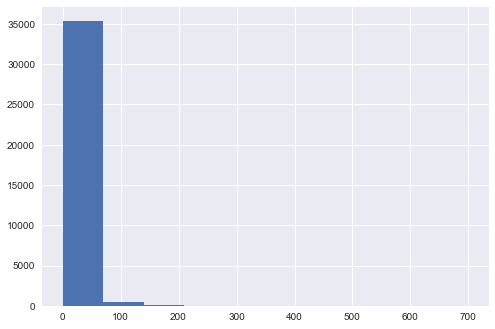

In [48]:
wcat['DaysInvoicetoEnrol'].hist()

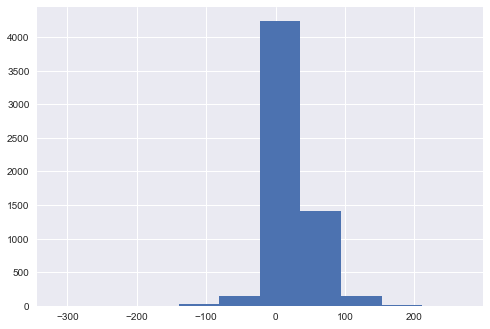

In [49]:
apacenrols['DaysEnroltoStartdate'].hist()

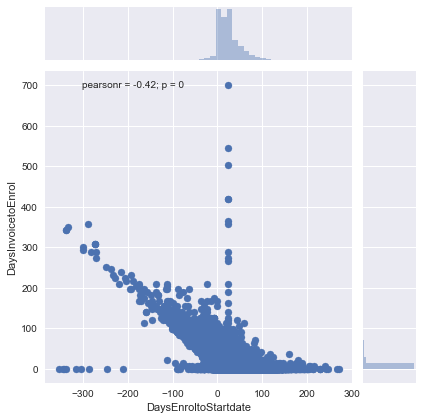

In [50]:
sns.jointplot(x='DaysEnroltoStartdate', y="DaysInvoicetoEnrol", data=enrolments)

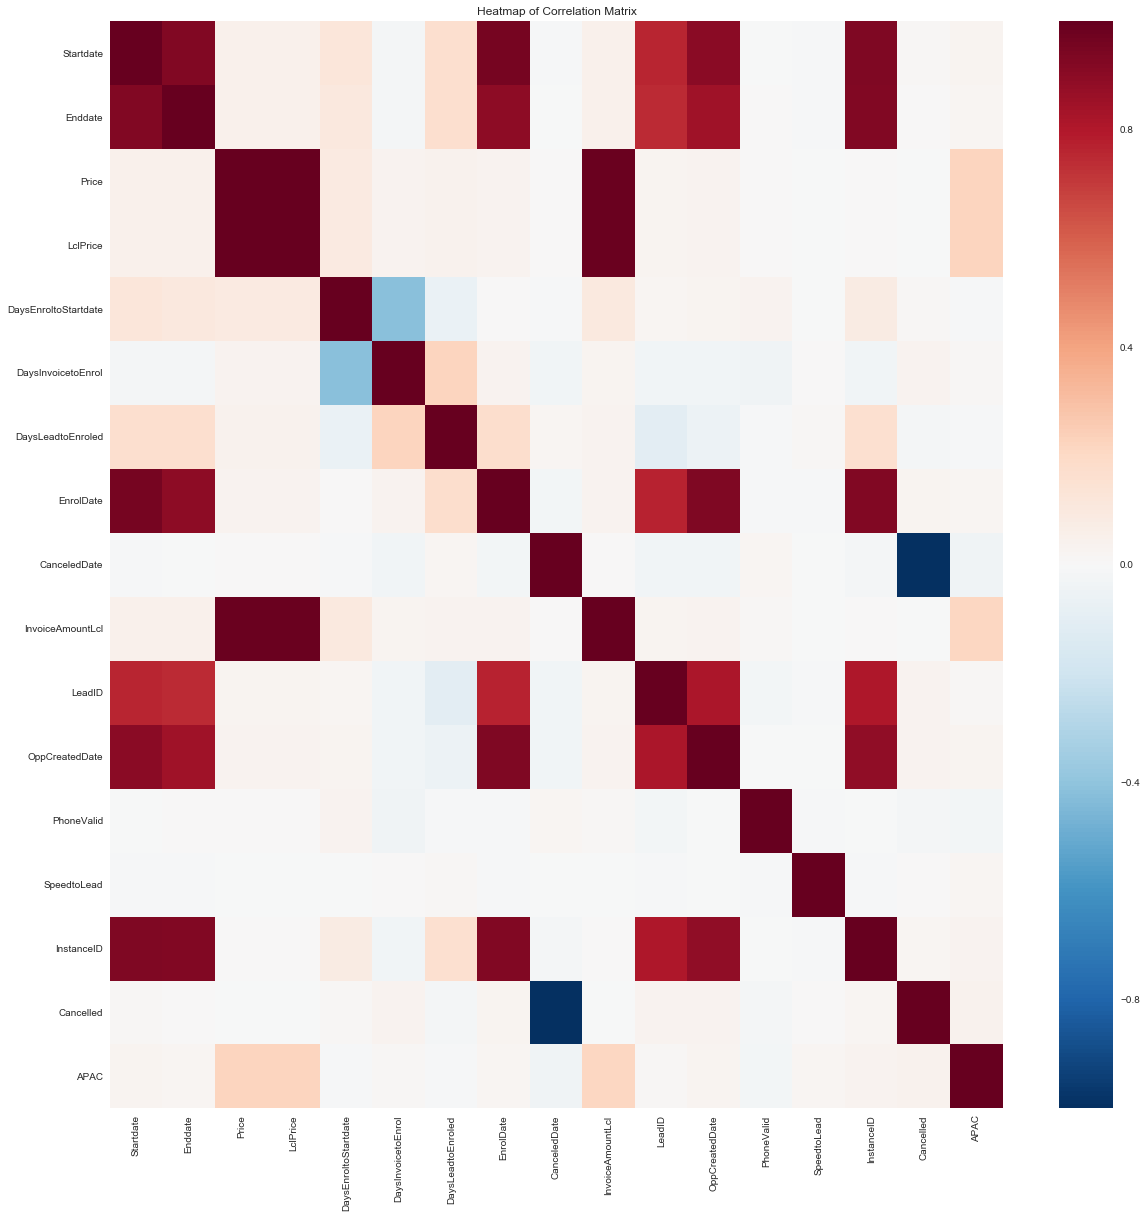

In [51]:
corr = enrolments.corr()
corr = (corr)
corr_cancelled = pd.DataFrame(corr['Cancelled'].drop('Cancelled'))
corr_cancelled.sort_values(by = 'Cancelled', ascending = False)
plt.figure(figsize = (20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

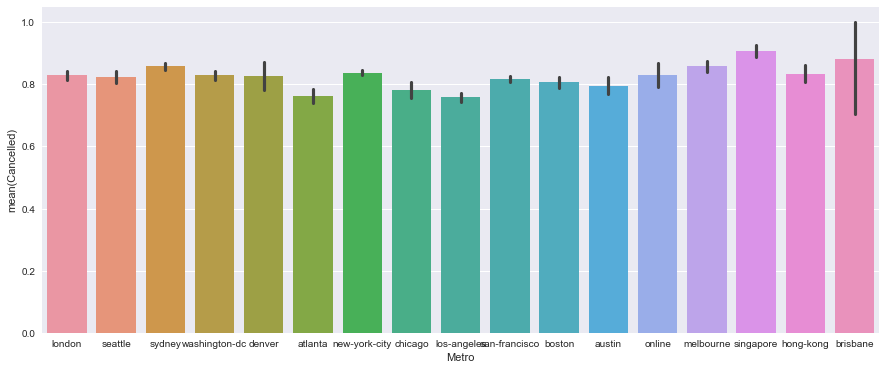

In [52]:
plt.figure(figsize = (15,6))
sns.barplot(x='Metro', y = 'Cancelled', data = enrolments)

### Tree Subset

In [53]:
treesubset = enrolments[['Startdate', 'Enddate','Price','LclPrice','EnrolDate','DaysEnroltoStartdate','DaysInvoicetoEnrol','DaysLeadtoEnroled','Cancelled','APAC']]
treesubset.head()

,Startdate,Enddate,Price,LclPrice,EnrolDate,DaysEnroltoStartdate,DaysInvoicetoEnrol,DaysLeadtoEnroled,Cancelled,APAC
0,20171127,20180209,9000,9000,20170605,175.0,7,89,True,False
1,20171127,20180223,8000,8000,20170621,159.0,0,37,True,False
2,20171127,20180223,13950,13950,20170402,239.0,7,27,True,False
3,20171127,20180223,8000,8000,20170509,202.0,0,25,True,False
4,20171127,20180223,13950,13950,20170615,165.0,0,56,True,False


In [54]:
treesubset['DaysEnroltoStartdate'].fillna(value=0,inplace=True)

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [55]:
treesubset.describe()
treesubset.isnull().sum()

Startdate               0
Enddate                 0
Price                   0
LclPrice                0
EnrolDate               0
DaysEnroltoStartdate    0
DaysInvoicetoEnrol      0
DaysLeadtoEnroled       0
Cancelled               0
APAC                    0
dtype: int64

In [56]:
treesubset.Cancelled.value_counts()

True     30860
False     6645
Name: Cancelled, dtype: int64

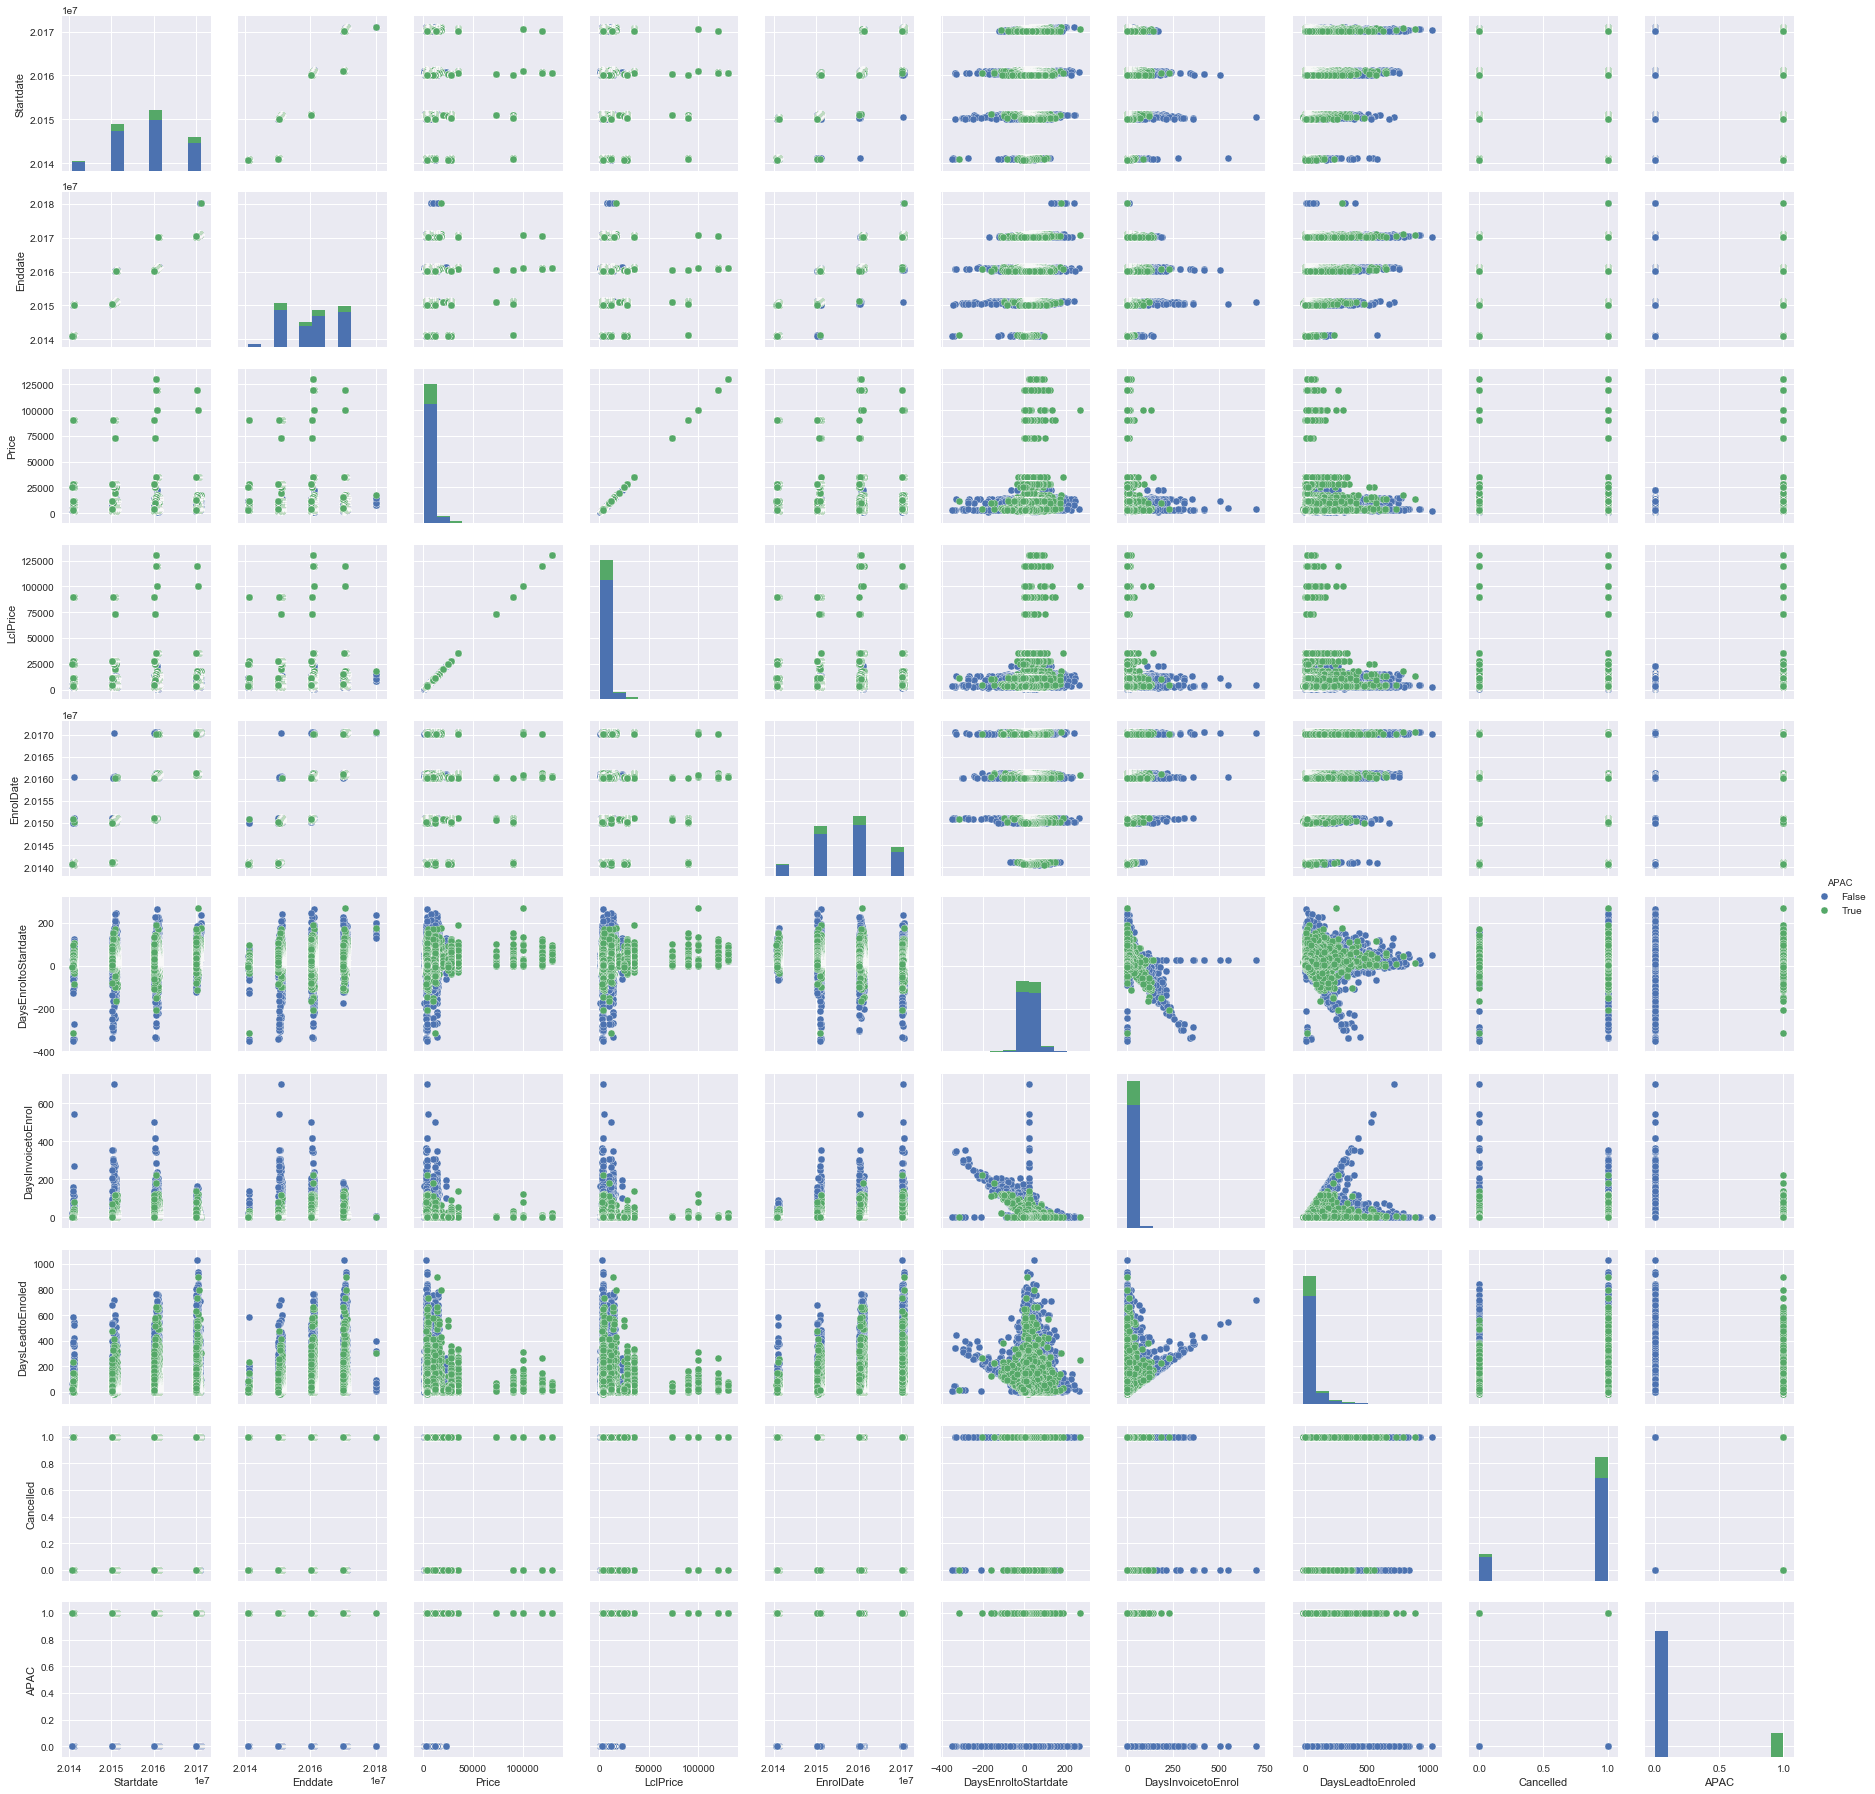

In [57]:
sns.pairplot(treesubset, hue='APAC')

In [58]:
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

cancelled = treesubset['Cancelled']
del treesubset['Cancelled']
treesubset

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



,Startdate,Enddate,Price,LclPrice,EnrolDate,DaysEnroltoStartdate,DaysInvoicetoEnrol,DaysLeadtoEnroled,APAC
0,20171127,20180209,9000,9000,20170605,175.000000,7,89,False
1,20171127,20180223,8000,8000,20170621,159.000000,0,37,False
2,20171127,20180223,13950,13950,20170402,239.000000,7,27,False
3,20171127,20180223,8000,8000,20170509,202.000000,0,25,False
4,20171127,20180223,13950,13950,20170615,165.000000,0,56,False
5,20171127,20180223,8000,8000,20170610,170.000000,0,36,False
6,20171127,20180223,13950,13950,20170511,200.000000,0,9,False
7,20171127,20180223,8000,8000,20170512,199.000000,0,19,False
8,20171120,20180223,17500,17500,20170527,176.000000,0,299,True
9,20171030,20180112,13950,13950,20170515,168.000000,7,299,False


In [59]:
X_train, X_test, y_train, y_test = train_test_split(treesubset, cancelled, random_state=1)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
# Fit the decision tree classifier
ctree.fit(X_train, y_train)
# Create a feature vector
features = treesubset.columns.tolist()
features

['Startdate',
 'Enddate',
 'Price',
 'LclPrice',
 'EnrolDate',
 'DaysEnroltoStartdate',
 'DaysInvoicetoEnrol',
 'DaysLeadtoEnroled',
 'APAC']

In [60]:
from io import StringIO
out = StringIO()
tree.export_graphviz(ctree, out_file = out)
from sklearn.tree import export_graphviz
export_graphviz(ctree, out_file='decisiontree.dot', feature_names=features)

#### Previously exported: 
<img src="decisiontree-enrolments.png">

### Linear or Logistic Regression?

In [ ]:
import pandas as pd
# data = enrolments

enrolmentswd = pd.get_dummies(data=enrolments, columns = ['ApplicationType'], prefix = ['ApplicationType'] )
#define the columns to read (x), and the target (y)
feature_cols = ['DaysEnroltoStartdate','DaysInvoicetoEnrol','DaysLeadtoEnroled']
X = enrolmentswd[feature_cols]
y = enrolmentswd.Cancelled

In [ ]:
enrolmentswd['DaysEnroltoStartdate'].fillna(value=0,inplace=True)
enrolmentswd['ExpectedPayment'].fillna(value=0,inplace=True)
enrolmentswd.isnull().sum()

In [ ]:
#split the data
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#fit the logreg model and print the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
print(logreg.fit(X_train, y_train))

In [ ]:
#test accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

In [ ]:
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb_class))

In [ ]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)

In [ ]:
print(scores.mean())

In [ ]:
#print the confusion matrix
from sklearn import metrics
prds = logreg.predict(X)
print(metrics.confusion_matrix(y_test, y_pred_class))

In [ ]:
#generate the ROC curve
import matplotlib.pyplot as plt
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr,tpr)
# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
# Our aim when modelling is to maximise the area under the curve, the closer to one the better the model.

#### Regression 

In [ ]:
print('RMSE (No reg.) =', np.sqrt(metrics.mean_squared_error(y_test,y_pred_class)))

In [ ]:
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-5, 5)
rregcv = RidgeCV(normalize=True, scoring='neg_mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)
# Print the optimal value of Alpha for Ridge Regression
print('Optimal Alpha Value: ', rregcv.alpha_)
# Print the RMSE for the ridge regression model
preds = rregcv.predict(X_test)
print ('RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [ ]:
from sklearn.linear_model import LassoCV
alpha_range = 10.**np.arange(-4, 4)
lascv = LassoCV(normalize=True, alphas=alpha_range)
lascv.fit(X_train, y_train)
print('Optimal Alpha Value: ',lascv.alpha_)
lascv.coef_
preds = lascv.predict(X_test)
print('RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [ ]:
from sklearn.linear_model import ElasticNetCV
alpha_range = 10.**np.arange(-3, 3)
enetCV = ElasticNetCV(normalize=True, alphas=alpha_range)
enetCV.fit(X_train, y_train)
print('Optimal Alpha Value: ',enetCV.alpha_)
enetCV.coef_
preds = enetCV.predict(X_test)
print('RMSE (ENET CV reg.)', np.sqrt(metrics.mean_squared_error(y_test, preds)))

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(5)
KNN_model.fit(X_train, y_train)
y_pred_class = KNN_model.predict(X_test)
# Print the new accuracy rate
print(metrics.accuracy_score(y_test, y_pred_class))